# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
!pip install tomotopy
import tomotopy as tp
import little_mallet_wrapper
import pandas as pd
import re

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
#Here, we will import the two data sets and concatenate them to create one dataframe

trump = pd.read_csv('trump_tweets.csv', encoding='utf-8')
bernie = pd.read_csv('sanders_tweets.csv', encoding='utf-8')

dfs = [trump, bernie]
combined_df = pd.concat(dfs)

combined_df.sample(5)

,Username,TweetId,Title,Content
20333,@realDonaldTrump,1305382305402241024,@realDonaldTrump_1305382305402241024,https://t.co/qZ1OCJznjL
6375,SenSanders,731590947977502720,SenSanders_731590947977502720,We must have the guts to stand up to the fossi...
2770,@realDonaldTrump,966420452070559749,@realDonaldTrump_966420452070559749,.@FLOTUS Melania and I join millions of peopl...
4495,@realDonaldTrump,1032393212126613504,@realDonaldTrump_1032393212126613504,https://t.co/wYCNmkkaNR
983,SenSanders,1215315169980698624,SenSanders_1215315169980698624,I will do everything that I can as a United St...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [3]:
#Q3 (code)

In [134]:
#Then, we can create the training data by iterating over the tweets in the dataframe 

training_data = []
original_texts = []
titles = []

for index, row in combined_df.iterrows():
    tweet = row['Content']
    #removing punctutuation
    text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', tweet, flags=re.MULTILINE)
    #process the tweet using little mallet wrapper
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(row['Title'])



## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [145]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    
my_model = model.save('LDAtweets.bin')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.263178840822878
Iteration: 10	Log-likelihood: -8.845856537275644
Iteration: 20	Log-likelihood: -8.668162441411024
Iteration: 30	Log-likelihood: -8.575553596519162
Iteration: 40	Log-likelihood: -8.51773306302842
Iteration: 50	Log-likelihood: -8.478896331741584
Iteration: 60	Log-likelihood: -8.449007561616694
Iteration: 70	Log-likelihood: -8.427063896163256
Iteration: 80	Log-likelihood: -8.410158511050957
Iteration: 90	Log-likelihood: -8.396184851502401


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [152]:
# Q5a (code)
model = tp.LDAModel.load('LDAtweets.bin')

print("\nTopic Model Results:\n\n")
num_topics = 15
num_topic_words = 10
topics = []
topic_individual_words = []

#Here, we can iterate over the topics and print themm out as they are added to the list of topics
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"Topic {topic_number}\n\n{topic_words}\n")


Topic Model Results:


Topic 0

china united states trade deal president great many korea good

Topic 1

tax workers billion million pay working trump year dollars class

Topic 2

trump war states united people president must federal covid government

Topic 3

border jobs country economy ever wall years great democrats record

Topic 4

news fake media people even never would bad like much

Topic 5

change must climate energy people american trump jobs fossil stand

Topic 6

trump fbi russia collusion campaign mueller witch hillary hunt obama

Topic 7

health care people right americans insurance must republicans need million

Topic 8

trump biden president joe left radical watch live sanders sleepy

Topic 9

new great election law one york book thank trump never

Topic 10

democrats impeachment president house senate nothing want republicans pelosi schiff

Topic 11

great court endorsement total complete military strong amendment supreme vets

Topic 12

people must country american se

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?
#### Topic 0: china united states trade deal president great many korea good
This topic seems related to foriegn policy and trade with China and Korea. The words like great and good suggest a positive relationship between these nations. 

#### Topic 1: tax workers billion million pay working trump year dollars class
This topic is related to the economy and economic class. References to 'workers' and 'working', in addition to 'tax' and 'pay' seem to relate to wages and distribution of wealth within the economy. This relates to left-wing populism which focuses on the redistribution of wealth and empowerment of the working class. 

#### Topic 2: trump war states united people president must federal covid government
Based on 'covid' as a key word, this topic seems to revolve around the government, specifically 'Trump' and 'president''s, response to the pandemic. 

#### Topic 3: border jobs country economy ever wall years great democrats record
Topic 3 relates to immigration and the impact of immigrants on the economy. This topic seems more related to right-wing populism which has concerns over immigration.

#### Topic 4: news fake media people even never would bad like much
These keywords are related to misinformation especially in reporting and media. The words such as 'bad', 'fake', and 'never' seem to give a negative connotation towards news within the topic. 

#### Topic 5: change must climate energy people american trump jobs fossil stand
This topic describes climate change and call for climate change policy. Additionally, there is an economic aspect fo this topic with'jobs,' which potentially is related to employement in the energy sector. 

#### Topic 6: trump fbi russia collusion campaign mueller witch hillary hunt obama
Topic 6 is related to conspiracy surrounding elections or candidates based on 'collusion' and 'witch hunt.' This topic could be based on the investigation of alleged 'Russian' interferences in the 2016 election that was conducted by 'FBI' director Richard 'Mueller'. This topic also mentions the candidates of the 2016 election 'trump', and 'hillary' in addition to the 'campaign.'

#### Topic 7: health care people right americans insurance must republicans need million
This topic relates to access to healthcare. Based on the keywords, it seems that the topic is about the right to health care and health insurance for American people, which fits left-wing ideals of expanding social and health services. 


#### Topic 8: trump biden president joe left radical watch live sanders sleepy
This topic relates to the presidential election and the candidates involved. Because of 'watch' and 'live,' this could also refer to presidential debates. 

#### Topic 9: new great election law one york book thank trump never
Topic 9 seems related to elections, possibly in New York. 

#### Topic 10: democrats impeachment president house senate nothing want republicans pelosi schiff
This topic is related to Donald Trump's impeachment trials, where Nancy Pelosi and Schiff were leading figures.  

#### Topic 11: great court endorsement total complete military strong amendment supreme vets
This topic seems to be related to the military (military and vets) as well as the Supreme Court (supreme court amendment). Based on the words in this topic, there is an idea about strength, unification, and support in the military (endorsement, total, complete, strong, great). 

#### Topic 12: people must country american security americans drug social america need
This topic is related to american society and people, specifically surrounding safety. Because of words such as 'social,' 'people,' and 'american,' it seems to be related to citizens and their 'need' for 'security.' 

#### Topic 13: great thank big vote america state win get maga see
These keywords are also related to elections and voting in the USA. Because the word 'maga' is part of this cluster, it could be related to Trump's presidential campaign. 

#### Topic 14: today great president thank day honor women america american first
This topic seems to be related to nationalism, and has an overall positive connotation with the words "great", "honor", "thank", and "first". This could be related to right-wing ideals of preservation of and pride in American values. 



## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [147]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5801292139788469 
Per Topic: [0.5693902790546417, 0.630062498152256, 0.5041104167699814, 0.47911166548728945, 0.6041273750364781, 0.545281958580017, 0.7541064262390137, 0.6546704888343811, 0.5501302093267441, 0.48142290860414505, 0.6151526272296906, 0.7152451068162918, 0.5330653697252273, 0.5336645185947418, 0.5323963612318039]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
Initially, I used 10 topics to train the model, which resulted in a 0.5683 coherence score for 10 topics. To experiment more, 
I then used 5 topics to train the model which lead to a 0.4905877 coherence score, a drop from the 10 original topics. Training with 12 topics, the coherence score became 0.537323. 
Using 15 topics to train the model, I then got an average coherence score of 0.580129, which a slight increase
from training with 10 topics.  However, moving up to training on 20 topics, the coherence score dropped to an 
average of 0.558518. The average coherence score is a measure that quantifies the semanitic similarity between 
the words in the given top, and because the model trained on 15 topics had the highest average coherence score, 
we can determine it will give the most thematically consistent topics and results. 

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

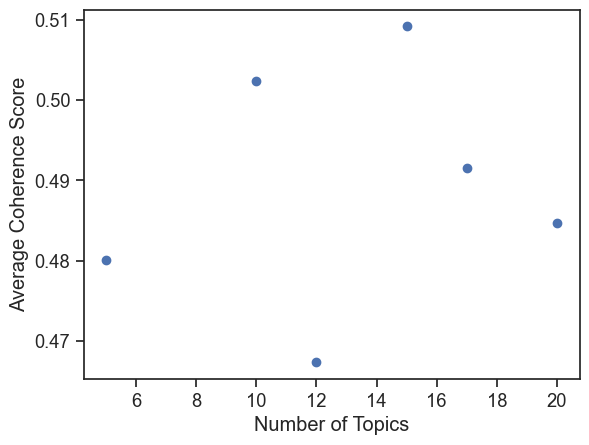

In [148]:
# X1 (code)
import matplotlib.pyplot as plt

#this function would take a list of integers that determines how many topics to train the model on and the training data
# eg- if topic_num_in_model = [10, 20, 25], this funciton will do a model for 10 topics, 20 topics, and 25 topics and plot their coherences

def avg_plot(topic_num_in_model, training_data):
    y = []
   
    counter = 0
    for topics in topic_num_in_model:
        num_topics = topic_num_in_model[counter]

        # Intialize the model
        model = tp.LDAModel(k=num_topics)

        # Add each document to the model, after splitting it up into words
        for text in training_data:
            model.add_doc(text.strip().split())
    
        # Iterate over the data 10 times
        iterations = 10
        for i in range(0, 100, iterations):
            model.train(iterations)
         
        #calculate the coherence for the topic number and add it to the y value coherence list
        coh = tp.coherence.Coherence(model, coherence='c_v')
        y.append(coh.get_score())
        
    #plot the coherences 
    plt.scatter(topic_num_in_model, y)
    plt.xlabel("Number of Topics")
    plt.ylabel("Average Coherence Score")
    
# calling the function 
topic_num = [5, 10, 12, 15, 17, 20]
avg_plot(topic_num, training_data)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [149]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
print(topic_distributions[0])

[0.013093718, 0.116440356, 0.011165501, 0.015354747, 0.017041527, 0.010400153, 0.011169568, 0.008946017, 0.113544315, 0.012821238, 0.014874033, 0.006478642, 0.21685441, 0.41927388, 0.012541903]


In [150]:
from IPython.display import Markdown, display
import re
tweet_dict = dict(zip(original_texts, titles))

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        author = tweet_dict[doc]
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
    
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Tweet**: {doc}   \n**Author**: {author} \n\n')

    return

In [168]:
#Getting top tweets and authors for Topic 1
get_top_docs(original_texts, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

tax workers billion million pay working trump year dollars class



---


✨  
**Topic Probability**: 0.9412944316864014  
**Tweet**:  I will easily &amp; quickly win Georgia if Governor  or the Secretary of State permit a simple signature verification. Has not been done and will show large scale discrepancies. Why are these two “Republicans” saying no? If we win Georgia, everything else falls in place!   
**Author**: @realDonaldTrump_1335268230206722048 



✨  
**Topic Probability**: 0.9392638206481934  
**Tweet**: Justice for frontline **workers** means childcare, safe conditions and $500 a week in hazard **pay** to:

🛒Grocery **workers**
👷🏼‍♀️Transit workers and truck drivers
📦Warehouse, delivery and postal workers
👩🏽‍⚕️Paramedics, nurses, pharmacy employees
🧺Domestic workers
👨🏼‍🌾Farm laborers
🧼Janitors   
**Author**: SenSanders_1251590423975428096 



✨  
**Topic Probability**: 0.9370876550674438  
**Tweet**: At this week's Senate hearing, Trump administration officials repeatedly evaded my simple question. 

So I am once again asking: , when a COVID-19 vaccine is approved, will it be made available to everyone in America without cost?    
**Author**: SenSanders_1261064384387911680 



✨  
**Topic Probability**: 0.9265626668930054  
**Tweet**: I wonder why Donald Trump vetoed our historic legislation to end U.S. involvement in the brutal bombing of Yemen. Who benefits from that?

Raytheon, Boeing, Lockheed Martin, and General Dynamics: the four corporations making 90 percent of the weapons that we sell to Saudi Arabia.   
**Author**: SenSanders_1155913781647675392 



✨  
**Topic Probability**: 0.9265626668930054  
**Tweet**:  RT : Swing States that have found massive VOTER FRAUD, which is all of them, CANNOT LEGALLY CERTIFY these votes as complete &amp; correct without committing a severely punishable crime. Everybody knows that dead people, below age people, illegal immigrants, fake signatures, prisoners,....   
**Author**: @realDonaldTrump_1338493640486907908 



#### This topic seems related to left wing populism due to the focus on economic inequality, and there are three tweets by Sanders and two by Trump in the top documents. 

In [158]:
#Getting top tweets and authors for Topic 7
get_top_docs(original_texts, topic_distributions, topic_index=7, n=5)

### ✨Topic 7✨

health care people right americans insurance must republicans need million



---


✨  
**Topic Probability**: 0.9478337168693542  
**Tweet**:  Important News Conference today by lawyers on a very clear and viable path to victory. Pieces are very nicely falling into place. RNC at 12:00 P.M.   
**Author**: @realDonaldTrump_1329408856733184008 



✨  
**Topic Probability**: 0.9323252439498901  
**Tweet**: Under my legislation, the Opioid Crisis Accountability Act, Johnson &amp; Johnson would be fined $7.8 billion—13 times as much as this penalty, about half of the company's profits, and 10 percent of the total annual cost of the terrible opioid crisis afflicting our country.   
**Author**: SenSanders_1166480275410423808 



✨  
**Topic Probability**: 0.9191884398460388  
**Tweet**: Jane and I wish you a safe and merry Christmas, and happy holidays. This has been an enormously difficult year for far too many. As we head into the new year, let us rededicate ourselves to building a world of peace, justice and compassion for all.   
**Author**: SenSanders_1342503696110915584 



✨  
**Topic Probability**: 0.9191884398460388  
**Tweet**:  “It’s a mean &amp; nasty world out there, the Middle East in particular. This is a long and historic commitment, &amp; one that is absolutely vital to America’s national security.”   I agree 100%. In addition, many Billions of Dollars of purchases made in U.S., big Jobs &amp; Oil!   
**Author**: @realDonaldTrump_1065575219576926208 



✨  
**Topic Probability**: 0.9087307453155518  
**Tweet**:  Great Red Wave!    
**Author**: @realDonaldTrump_1322218164361388037 



In [157]:
#Getting top tweets and authors for Topic 4
get_top_docs(original_texts, topic_distributions, topic_index=4, n=5)

### ✨Topic 4✨

news fake media people even never would bad like much



---


✨  
**Topic Probability**: 0.9301121830940247  
**Tweet**:  RT : Breaking Poll: 52% Say Impeachment Is Political Stunt by Democrats - 59% Say It's a Waste of Time    via    
**Author**: @realDonaldTrump_1187766306365411329 



✨  
**Topic Probability**: 0.9240110516548157  
**Tweet**:  RT : Trump is relaxed and his entertaining self tonight.  Enjoyable to watch!  #TrumpTownHall   
**Author**: @realDonaldTrump_1235795182454484993 



✨  
**Topic Probability**: 0.9240110516548157  
**Tweet**:  RT : Pennsylvania (former Democrat) voter stands by : “I **like** what’s happened in the country in the last 4 years” #TrumpTownHall      
**Author**: @realDonaldTrump_1235795194001399808 



✨  
**Topic Probability**: 0.9205427765846252  
**Tweet**:  America’s Private Sector is stepping up to help us be STRONG! Many of the Nation’s distillers, large and small, are producing and donating hand sanitizer to help fight #COVID19. THANK YOU!    
**Author**: @realDonaldTrump_1240765945968234496 



✨  
**Topic Probability**: 0.9167428016662598  
**Tweet**:  Puerto Rico got 91 Billion Dollars for the hurricane, more money than has ever been gotten for a hurricane before, &amp; all their local politicians do is complain &amp; ask for more money. The pols are grossly incompetent, spend the money foolishly or corruptly, &amp; only take from USA....   
**Author**: @realDonaldTrump_1113041708730802176 



In [155]:
#Getting top tweets and authors for Topic 6
get_top_docs(original_texts, topic_distributions, topic_index=6, n=5)

### ✨Topic 6✨

trump fbi russia collusion campaign mueller witch hillary hunt obama



---


✨  
**Topic Probability**: 0.9277762174606323  
**Tweet**:  Larry Kudlow will be my Chief Economic Advisor as Director of the National Economic Council. Our Country will have many years of Great Economic &amp; Financial Success, with low taxes, unparalleled innovation, fair trade and an ever expanding labor force leading the way! #MAGA   
**Author**: @realDonaldTrump_974241711315709954 



✨  
**Topic Probability**: 0.9247555136680603  
**Tweet**:  Bad lawyer and fraudster Michael Cohen said under sworn testimony that he never asked for a Pardon. His lawyers totally contradicted him. He lied! Additionally, he directly asked me for a pardon. I said NO. He lied again! He also badly wanted to work at the White House. He lied!   
**Author**: @realDonaldTrump_1104050224052396032 



✨  
**Topic Probability**: 0.9247555136680603  
**Tweet**:  .  “Bob Mueller, isn’t your whole investigation premised on a Fake Dossier, paid for by Hillary, created by a man who hates Donald Trump, &amp; used to con a FISA Court Judge. Bob, I really think it’s time for you to give up your phony investigation.” No Collusion!   
**Author**: @realDonaldTrump_1028618150944944129 



✨  
**Topic Probability**: 0.9178869128227234  
**Tweet**:  To the  Class of 2018, I say: We know you are up to the task. We know you will make us proud. We know that glory will be yours. Because you are WINNERS, you are WARRIORS, you are FIGHTERS, you are CHAMPIONS, and YOU will lead us to VICTORY! God Bless the U.S.A.!    
**Author**: @realDonaldTrump_1000114139136606209 



✨  
**Topic Probability**: 0.9178869128227234  
**Tweet**:  RT : . has expanded its guidance to nursing homes on how facilities should monitor, limit or restrict visitors &amp; staff w/ potential illness, &amp; transferring or accepting patients who have tested positive for or are suspected to have #COVID19.    
**Author**: @realDonaldTrump_1238100572450033666 



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Yes, based on these four topics, both topic 6 and 4 have top tweets only by one politician: Trump. Topics 1 and 7 I chose to try to represent the left-wing populist view, and they do contain tweets written by Bernie Sanders as well as Trump. I believe that topic 1 (tax workers billion million pay working trump year dollars class) and topic 7 (health care people right americans insurance must republicans need million) are more left-wing because they focus on topics like healthcare, taxes, exuberant wealth, and the people. Additionally, one of Bernie Sanders core ideologies is to make healthcare a human right and have medicare for all-- which falls into the concepts in topic 7. Topic 1 could potentially relate to both left and right wing populist ideologies because it is surrounding ideas of the 'common people' or the 'working class.' However, because it is related to taxes and millions/billions, it seemed to be about taxing the rich, which would fall more under Bernie than Trump. 

I chose Topics 4 and 6 because they both contain popular rhetoric or phrases that Trump has used on and off Twitter. For topic 4 (news fake media people even never would bad like much), 'fake news' is a phrase that Trump has used a lot to accuse the media of spreading misinformation and lies, or anything that did not align with his ideologies. For this topic, he tweeted all 5 of the top documents. Additionally, Topic 6 (trump fbi russia collusion campaign mueller witch hillary hunt obama) surrounds the conspiracy of Donald Trump's election and his accusation of collusion with Russia, which he denied as Robert Mueller led the investigation. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [159]:
# Crete a sample of tweets

from random import sample

target_labels = sample(sorted(titles),100)

In [160]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

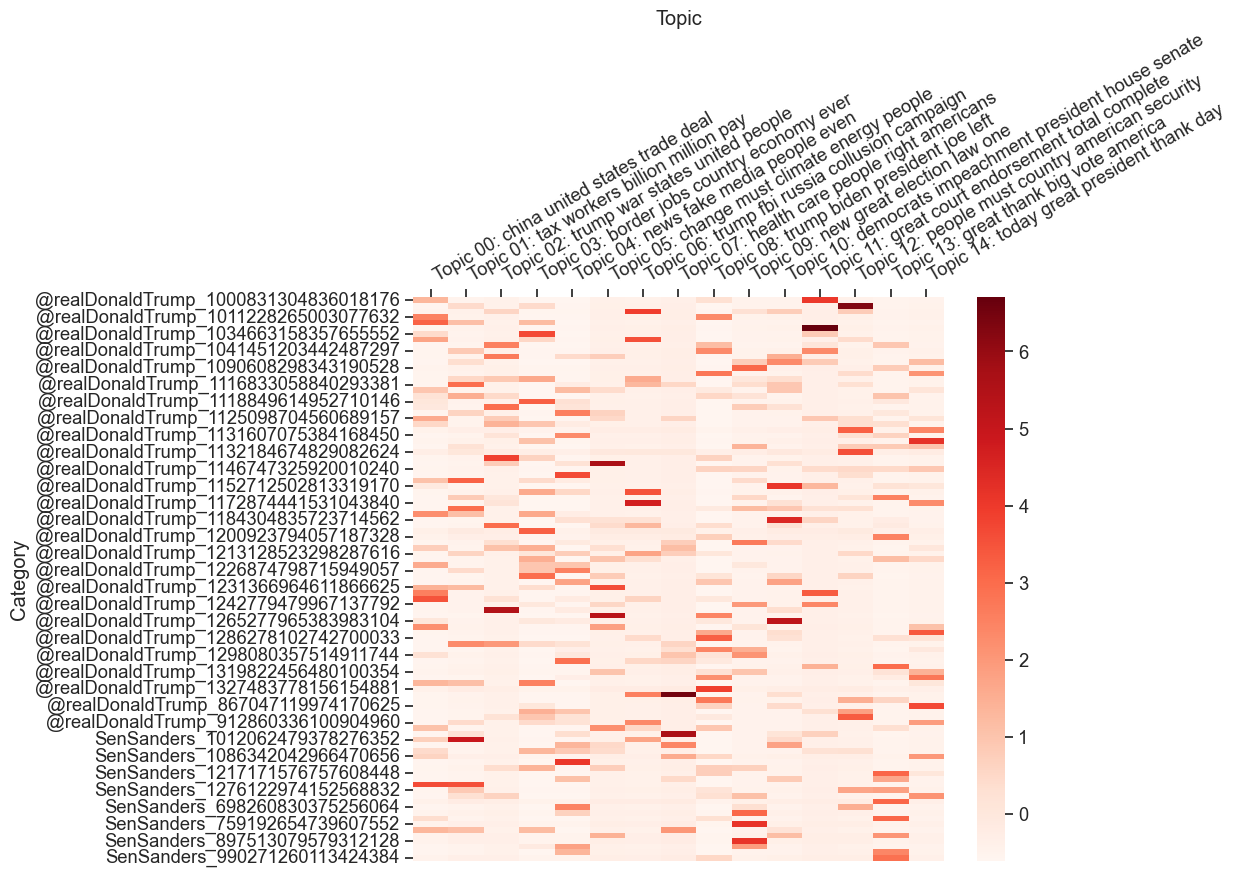

In [167]:
#calling the function using our random sample 
plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Reds',
                                    dim=(12,9))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
Based on this heatmap, it seems that there are three topics that are more concentrated in Bernie Sanders tweets: Topic 4, Topic 9, and Topic 13. However, Donald Trump's tweets are more dominant in this dataset and for all topics seem to have tweets that fit into the category. Therefore, for this analysis, I focused more on the probabilities in Bernie Sander's tweets. For the three topics, there are concentrations of darker red probabilities in Bernie Sanders tweets that indicate relation to the topics. 

Generally, Trump seems to have tweets in this sample that could relate to all of the topics. However, this may be due to the fact that he has more tweets than Bernie Sanders, and is therefore more controlling of the Twitter narrative and the topics. 





### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [164]:
# X2 (code)

#creating a function to subset the tweets into their respective authors
def subsets(titles, president):
    
    selected_items = pd.Series([item for item in titles if president in item])
    return selected_items


bernies = subsets(titles, 'SenSanders')
trumps = subsets(titles, 'DonaldTrump')

#taking a random sample of 50 from each new subset
bern = sample(sorted(bernies),50)
trump = sample(sorted(trumps), 50)

#putting them together to create a balanced sample
balanced_sample = bern + trump


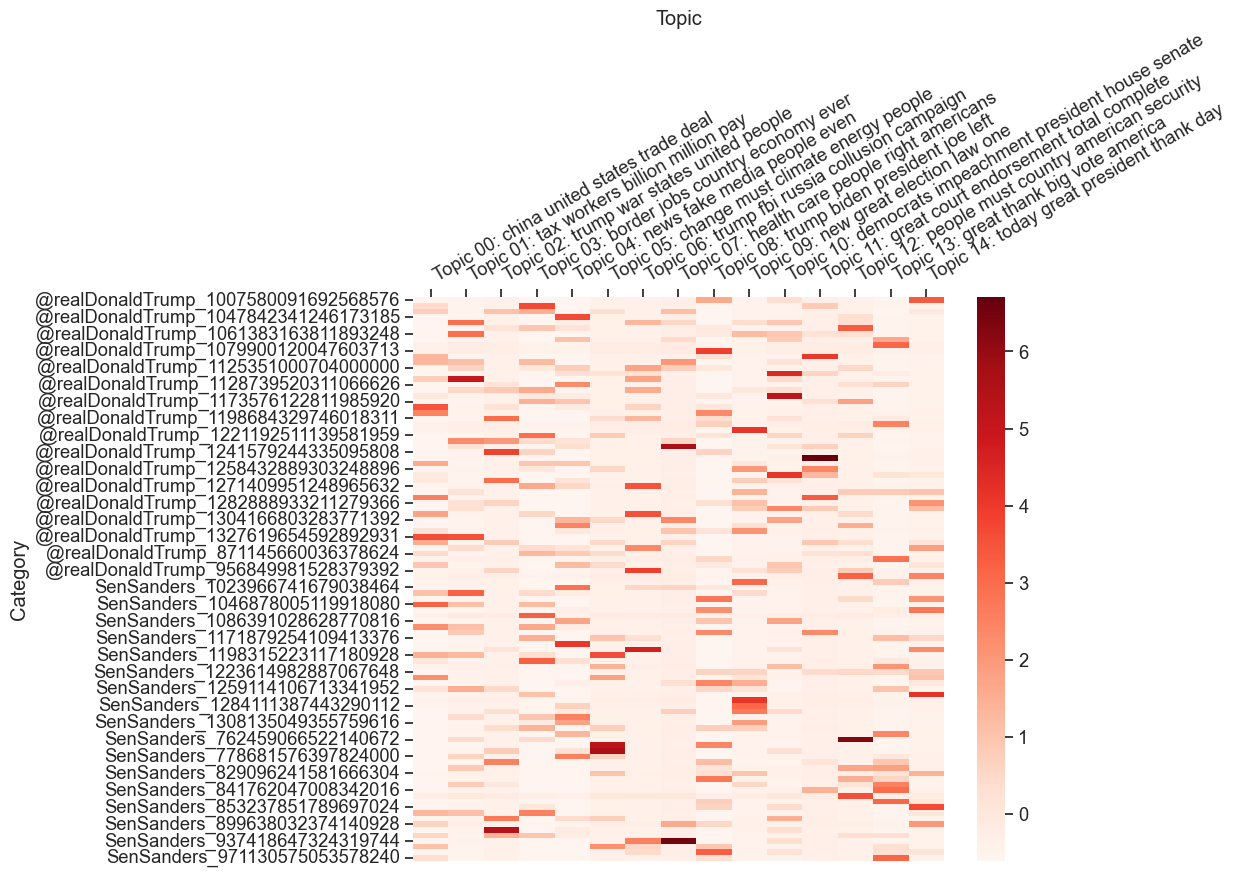

In [165]:
#call the heat map funciton using the new balanced sample
plot_categories_by_topics_heatmap(balanced_sample,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels = balanced_sample,
                                  color_map = 'Reds',
                                    dim=(12,9))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [166]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)
